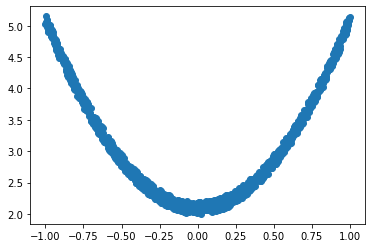

tensor(9296.7393, grad_fn=<SumBackward0>)
tensor(159.9179, grad_fn=<SumBackward0>)
tensor(31.7716, grad_fn=<SumBackward0>)
tensor(7.3787, grad_fn=<SumBackward0>)
tensor(2.7355, grad_fn=<SumBackward0>)
tensor(1.8516, grad_fn=<SumBackward0>)
tensor(1.6834, grad_fn=<SumBackward0>)
tensor(1.6513, grad_fn=<SumBackward0>)
tensor(1.6452, grad_fn=<SumBackward0>)
tensor(1.6441, grad_fn=<SumBackward0>)


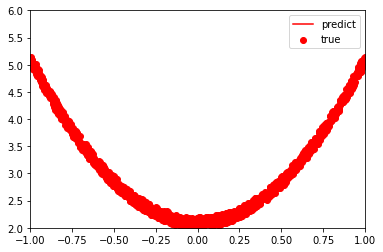

tensor([[3.0098]], requires_grad=True) tensor([[2.0937]], requires_grad=True)


In [50]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt

# 生成训练数据
t.manual_seed(100)
dtype = t.float
x = t.unsqueeze(t.linspace(-1, 1, 1000), dim=1)
y = 3*x.pow(2) + 2 + 0.2*torch.rand(x.size())

# 可视化
plt.scatter(x.numpy(), y.numpy())
plt.show()

# 初始化权重参数
w = t.randn(1, 1, dtype=dtype, requires_grad=True)
b = t.zeros(1, 1, dtype=dtype, requires_grad=True)

# 训练模型
def train(lr, w, b, x, y):
    for i in range(100):
        # 前向传播并定义loss函数
        y_pred = x.pow(2).mm(w) + b
        loss = 0.5 * (y_pred - y) ** 2
        loss = loss.sum()
        
        # 自动计算梯度
        loss.backward()
        
        # 手动更新参数，需要用到torch.no_grad()，使上下文环境中切断自动求导的计算
        with t.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
        
        # 梯度清零
            w.grad.zero_()
            b.grad.zero_()
        if i%10==0 :
            print(loss)
    return y_pred

# 可视化训练结果
lr = 0.001

y_pred = train(lr, w, b, x, y)
plt.plot(x.numpy(), y_pred.detach().numpy(), 'r-', label='predict')
plt.scatter(x.numpy(), y.numpy(), color='red', marker='o', label='true')
plt.xlim(-1, 1)
plt.ylim(2, 6)
plt.legend()
plt.show()
print(w, b)